<a href="https://colab.research.google.com/github/mariyajoseph2002/ml/blob/main/cnn_vo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade tensorflow

In [2]:
!pip freeze

absl-py==1.4.0
accelerate==1.3.0
aiohappyeyeballs==2.4.6
aiohttp==3.11.13
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.4
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.6.0
arviz==0.20.0
astropy==7.0.1
astropy-iers-data==0.2025.2.24.0.34.4
astunparse==1.6.3
atpublic==4.1.0
attrs==25.1.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.38.0
bigquery-magics==0.6.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.2.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.20.0
cloudpickle==3.1.1
cmake==3.31.4
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [4]:
import tensorflow  as tf
from tensorflow import keras

In [5]:
from keras.datasets import fashion_mnist

In [6]:
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

for ann we need a 1 dimensional array and for cnn we need a 3 dimensional araay => height,width,channels
also we have 60000 data for training and 10000 for testing

data reshape

In [8]:
x_train_full=x_train_full.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))

data normalization
this is done cause all our pixel values are between 0 to 255  by diving it 255 so in this way all values are in 0 to 1

In [9]:
x_train_n=x_train_full/255
x_test_n=x_test/255

In [10]:
x_valid,x_train=x_train_n[:5000],x_train_n[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
x_test=x_test_n

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

the above thing is done so that we get the same results everytime we run

In [12]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
#to convert 3d matrix into 1 d
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │       1,622,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,654,130 (6.31 MB)

 Trainable params: 1,654,130 (6.31 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [15]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

In [18]:
model_history=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_valid,y_valid),callbacks=[early_stopping])

Epoch 1/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.5621 - loss: 1.4129 - val_accuracy: 0.7446 - val_loss: 0.7116
Epoch 2/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 36s 42ms/step - accuracy: 0.7939 - loss: 0.5666 - val_accuracy: 0.7974 - val_loss: 0.5774
Epoch 3/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.8213 - loss: 0.4927 - val_accuracy: 0.8172 - val_loss: 0.5148
Epoch 4/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 35s 41ms/step - accuracy: 0.8357 - loss: 0.4533 - val_accuracy: 0.8280 - val_loss: 0.4780
Epoch 5/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 36s 42ms/step - accuracy: 0.8449 - loss: 0.4256 - val_accuracy: 0.8386 - val_loss: 0.4431
Epoch 6/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.8541 - loss: 0.4040 - val_accuracy: 0.8464 - val_loss: 0.4234
Epoch 7/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 35s 41ms/step - accuracy: 0.8592 - loss: 0.3861 - val_accuracy: 0.8502 - val_loss: 0.4112
Epoch 8/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.8653 - loss: 0.3709 - 

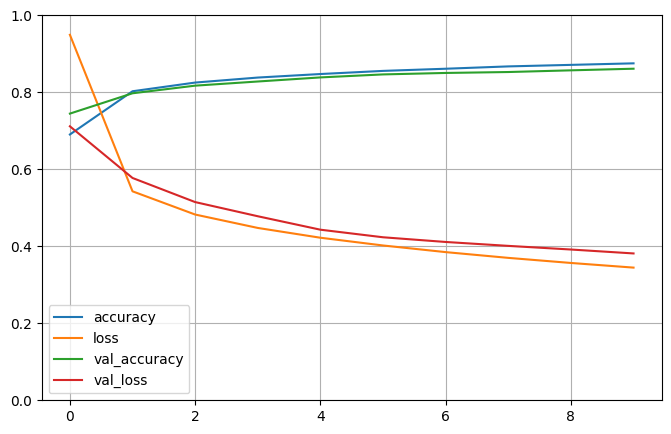

In [19]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
ev=model.evaluate(x_test_n,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8444 - loss: 0.4212


In [21]:
ev

[0.4295255243778229, 0.8385000228881836]

In [22]:
x_new=x_test[:3]

In [23]:
y_pred=np.argmax(model.predict(x_new),axis=1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([9, 2, 1])

In [24]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(shape=(28, 28))


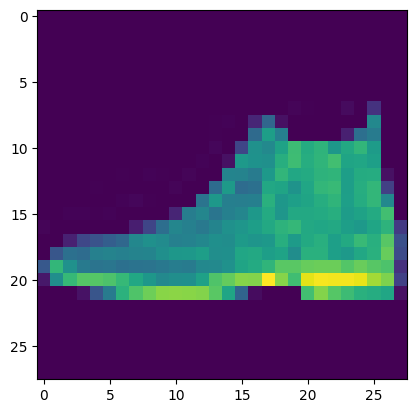

In [25]:
print(plt.imshow(x_test[0].reshape(28,28)))